# Changes in $|\cos \gamma_{\mathbf{\mathfrak{x}}^{(l)}, \mathbf{\mathfrak{u}}^{(l)}}|$ with the network width.

In [1]:
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
np.random.seed(7726)

COLOR_LIST = ['xkcd:yellow orange', 'xkcd:red', 'xkcd:irish green', 'xkcd:blue']

In [2]:
K_arr = [2, 3, 4, 5]

# Values of c based on the method suggested in the paper
C_ARR_SUGGESTED = [1, 0.78391, 0.64461, 0.55555] 

WEIGHT_SAMPLES = 100
DEPTH = 100

def compute_cosines(width):
    K_mean_cosines = []
    K_std_cosines = []
    for Ki,K in enumerate(K_arr):
        print(f'K: {K}')
        avg_cosines = np.zeros((DEPTH, WEIGHT_SAMPLES))

        x0 = np.random.normal(loc=0., scale=1, size=width)
        u0 = np.random.normal(loc=0., scale=1, size=width)
        u0 = u0 / np.linalg.norm(u0)

        for wsi in range(WEIGHT_SAMPLES):
            x = x0
            u = u0
            x = np.append(x, 1)
            u = np.append(u, 0)

            cosine = np.dot(x, u) / np.linalg.norm(x) # Norm of u is always 1  

            fan_in = width
            fan_out = width

            for d in range(DEPTH):
                weights = np.random.normal(loc=0., scale=np.sqrt(C_ARR_SUGGESTED[Ki]/fan_in),
                                           size=[fan_out, K, fan_in + 1])
                argmax = np.argmax(np.dot(weights, x), axis=-1)
                chosen_weights = np.asarray([w[a] for w,a in zip(weights, argmax)])
                x = np.max(np.dot(weights, x), axis=-1)
                x = np.append(x, 1)
                u = np.dot(chosen_weights, u)
                u = u / np.linalg.norm(u)
                u = np.append(u, 0)
                # Norm of u is always 1
                cosine = np.dot(x, u) / (np.linalg.norm(x) * np.linalg.norm(u))
                avg_cosines[d][wsi] = np.abs(cosine)

        K_mean_cosines.append(np.mean(avg_cosines, axis=-1))
        K_std_cosines.append(np.std(avg_cosines, axis=-1))
    return K_mean_cosines, K_std_cosines

In [3]:
def plot(K_mean_cosines, K_std_cosines, width):
    fig = plt.figure(figsize=(11, 6), dpi=100)
    ax = fig.add_subplot(111)
    ax.tick_params(axis='both', which='major', labelsize=26)
    ax.tick_params(axis='both', which='minor', labelsize=26)

    plt.xlabel("Layer", size=32)
    plt.ylabel("$|\cos \gamma|$", size=32)#, rotation=0, labelpad=30)
    plt.margins(x=0)

    layers = np.asarray(list(range(DEPTH))) + 1
    l_ticks = [1] + [l for l in layers if l % 20 == 0]
    plt.xticks(l_ticks)
    ax.set_ylim([0, 1.1])

    for Ki, (avg_cosines, std_cosines) in enumerate(zip(K_mean_cosines, K_std_cosines)):
        plt.plot(layers, avg_cosines, color=COLOR_LIST[Ki], lw=4, label=f'$K = {K_arr[Ki]}$')
        plt.fill_between(layers, avg_cosines + std_cosines, avg_cosines - std_cosines,
                    facecolor=COLOR_LIST[Ki], alpha=0.075)

    plt.plot(layers, np.ones(DEPTH), color='black', lw=3, ls='--', alpha=0.4)

    plt.legend(loc='lower right', title='Maxout rank', fontsize=14, title_fontsize=16)
    plt.legend(loc='center right', title='Maxout rank', fontsize=20, title_fontsize=22,
               bbox_to_anchor=(1.4, 0.5))

    plt.tight_layout()
    plt.savefig(f'cosines_width{width}.png', bbox_inches='tight')

K: 2
K: 3
K: 4
K: 5


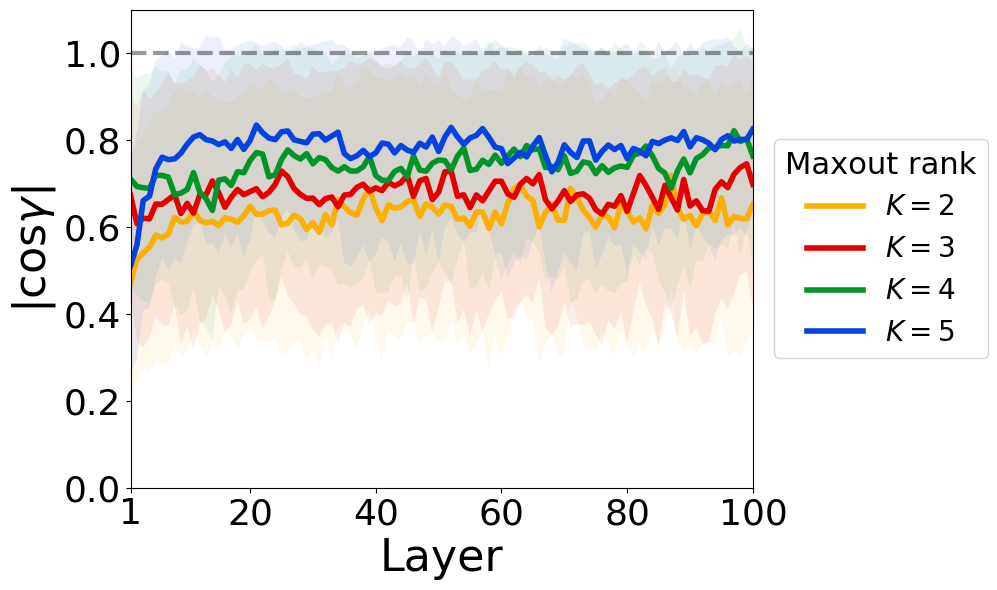

In [4]:
np.random.seed(7726)

width = 2
K_mean_cosines, K_std_cosines = compute_cosines(width=width)
plot(K_mean_cosines=K_mean_cosines, K_std_cosines=K_std_cosines, width=width)

K: 2
K: 3
K: 4
K: 5


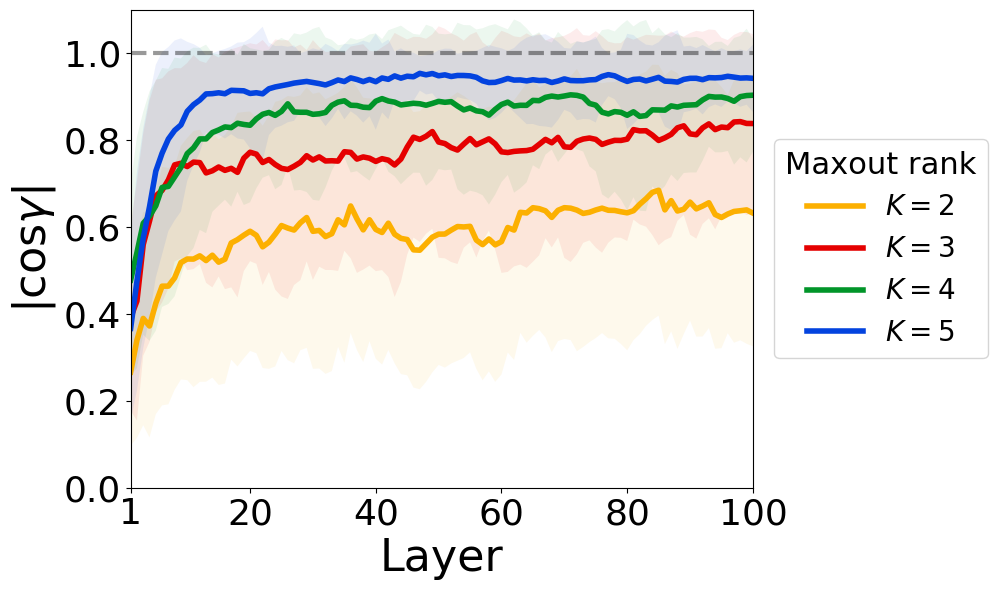

In [5]:
np.random.seed(7726)

width = 10
K_mean_cosines, K_std_cosines = compute_cosines(width=width)
plot(K_mean_cosines=K_mean_cosines, K_std_cosines=K_std_cosines, width=width)

K: 2
K: 3
K: 4
K: 5


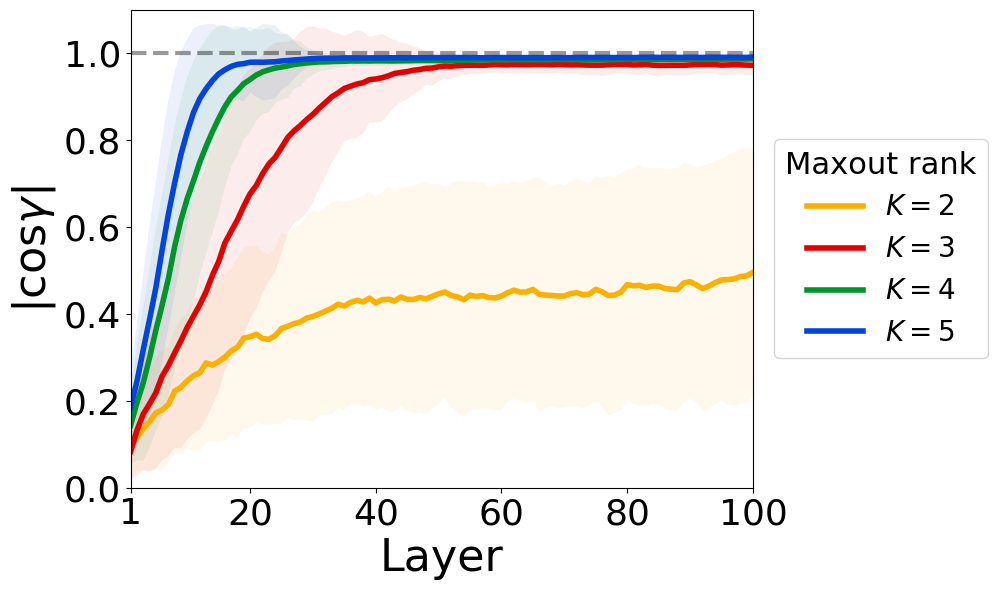

In [6]:
np.random.seed(7726)

width = 100
K_mean_cosines, K_std_cosines = compute_cosines(width=width)
plot(K_mean_cosines=K_mean_cosines, K_std_cosines=K_std_cosines, width=width)